In this code we compute all the order parameters needed to see the Super-conducting state. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
from Common_codes import correlation_functions_file_20_3_25 as cff
# from Common_codes import evolution_video_creator as evc
from Common_codes import generic_codes_20_3_25 as gc    
from Common_codes import class_defn_file_20_3_25 as cdf
# from Common_codes import evolution_video_creator as evc
from Common_codes import hamiltonian_derivative_matrices_20_3_25 as hdm

We first need to initialise all the variables and import all the data from the data files.

Position space grid created
Momentum space grid created
 J_0 matrix created


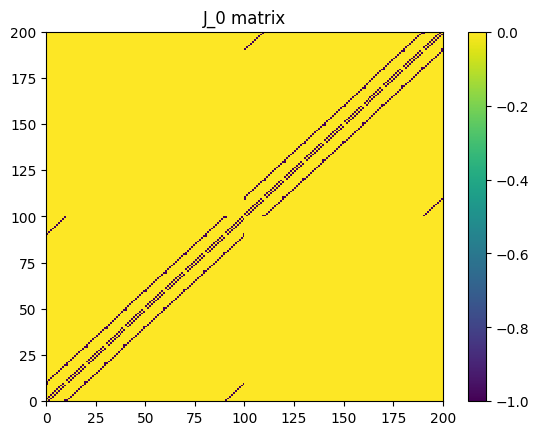

TypeError: kron(): argument 'other' (position 2) must be Tensor, not numpy.ndarray

In [ ]:
# Extracting the list of files in the directory
chemical_potential_val = -5.1

base_path = os.getcwd()
complete_path = base_path + '/data/Imaginary time evolution/mu='+str(chemical_potential_val)+'/t=95'
files = os.listdir(complete_path)
final_file_list = [file for file in files if 'imag_time_evo_final' in file]

###########################################################
###########################################################
number_of_points = 10
positon_value_max = [10 , 10]
positon_value_min = [0  , 0]
position_space_grid = gc.coordinate_array_creator_function(positon_value_min,positon_value_max,number_of_points,True)
N_f = np.shape(position_space_grid)[0]
print("Position space grid created")

momentum_value_max = [np.pi/(positon_value_max[0]-positon_value_min[0])*number_of_points ,np.pi/(positon_value_max[1]-positon_value_min[1])*number_of_points]
momentum_value_min = [-np.pi/(positon_value_max[0]-positon_value_min[0])*number_of_points ,-np.pi/(positon_value_max[1]-positon_value_min[1])*number_of_points]
momentum_space_grid = gc.coordinate_array_creator_function(momentum_value_min,momentum_value_max,number_of_points,False)
N_b = np.shape(momentum_space_grid)[0]
print("Momentum space grid created")

boson_space_grid = gc.coordinate_array_creator_function(positon_value_min,positon_value_max,number_of_points,False)
fourier_transform_matrix = gc.creating_fourier_matrix(momentum_space_grid,position_space_grid)

volume = np.prod(np.array(positon_value_max)-np.array(positon_value_min))

###########################################################
###########################################################

momentum_space_mesh = np.meshgrid(np.linspace(momentum_value_min[0],momentum_value_max[0],number_of_points,endpoint=False),np.linspace(momentum_value_min[1],momentum_value_max[1],number_of_points,endpoint=False))


###########################################################
###########################################################

J_0 = -1
J_0_matrix = torch.tensor(gc.creating_J_0_matrix(position_space_grid,J_0,positon_value_max[0],spin_index=True))
print(" J_0 matrix created")
plt.pcolormesh(J_0_matrix)
plt.title("J_0 matrix")
plt.colorbar()
plt.show()

# J_0_matrix = np.diag(np.ones(N_f)*J_0,1) + np.diag(np.ones(N_f)*J_0,-1)
omega_0 = 10*np.abs(J_0)
omega = torch.tensor(10*np.abs(J_0)*np.identity(N_b))
# print("omega matrix created")

gamma_0 = 0.5*omega_0
gamma = torch.tensor(gamma_0*np.append(np.identity(N_b),np.identity(N_b),axis = 1))

###########################################################
###########################################################
# Extracting delta_r
# filename = "imag_time_evo_final_delta_r_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_delta_r_mu_-5.5_t_25.npy"
# filename = "imag_time_evo_final_delta_r_mu_-4.7_t_130.npy"
# filename = "imag_time_evo_final_delta_r_mu_-5.9_t_40.npy"
# filename = "imag_time_evo_final_delta_r_mu_-5.1_t_50.npy"
# filename = "imag_time_evo_final_delta_r_mu_-4.9_t_50.npy"
filename_new = [file for file in final_file_list if 'delta_r' in file] 
# delta_r = np.load(filename[0])
delta_r = torch.tensor(np.load(complete_path+"/"+filename_new[0]))

# Extracting Gamma_b
# filename = "imag_time_evo_final_gamma_b_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-5.5_t_25.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-4.7_t_130.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-5.9_t_40.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-5.1_t_50.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-4.9_t_50.npy"
# Gamma_b = np.load(filename)

filename_new = [file for file in final_file_list if 'gamma_b' in file] 
Gamma_b = torch.tensor(np.load(complete_path+"/"+filename_new[0]))


# Extracting Gamma_m
# filename = "imag_time_evo_final_gamma_m_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-5.5_t_25.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-4.7_t_130.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-5.9_t_40.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-5.1_t_50.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-4.9_t_50.npy"
# Gamma_m = np.load(filename)

filename_new = [file for file in final_file_list if 'gamma_m' in file] 
Gamma_m = torch.tensor(np.load(complete_path+"/"+filename_new[0]))

# Extracting lambda_q 
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_sc_mu_m5p3_t=25.npy"),-1)
# lmbda = np.load("imag_time_evo_final_lambda_mu_-5.5_t_25.npy")
# lmbda = np.load("imag_time_evo_final_lambda_mu_-4.7_t_130.npy")
# lmbda = np.load("imag_time_evo_final_lambda_mu_-5.9_t_40.npy")
# lmbda = np.load("imag_time_evo_final_lambda_mu_-5.1_t_50.npy")
# lmbda = np.load("imag_time_evo_final_lambda_mu_-4.9_t_50.npy")
# lmbda = np.reshape( np.load(complete_path+"\\"+"imag_time_evo_lambda_complete_mu_-5.5_t_25.npy")[-1],(N_b,int(N_f/2)))
filename_new = [file for file in final_file_list if 'lambda' in file] 
lmbda = torch.tensor(np.load(complete_path+"/"+filename_new[0]))

# lmbda_complete = np.load("imag_time_evo_lambda_complete_mu_-5.5_t_25.npy")
# lmbda = np.reshape(lmbda_complete[-1],[100,100])
###########################################################
###########################################################
# Initialising the initial input variables 

initial_input_variables = cdf.input_variables(position_space_grid,boson_space_grid,fourier_transform_matrix,lmbda,J_0_matrix,gamma,omega,chemical_potential_val)
# initial_input_variables.updating_lambda_bar_from_lambda(lmbda_q=lmbda,volume=N_b)  # Note that here we need to change the volume if we ever do. Else, it is N_b.
initial_input_variables.updating_lambda(lmbda)  # Note that here we need to change the volume if we ever do. Else, it is N_b.
###########################################################
###########################################################

computed_variables_instance = cdf.computed_variables(N_b,N_f)

# Computing the values for the computed_varaibles class
computed_variables_instance.initialize_all_variables(initial_input_variables,delta_r,Gamma_b)

###########################################################
###########################################################
print("Completed extraction of matrices from the files")


Superconducting order parameter

In [9]:
files

['t=75', 't=20', 't=95', 't=50.5', 't=65', 't=50', 't=55', 't=85']

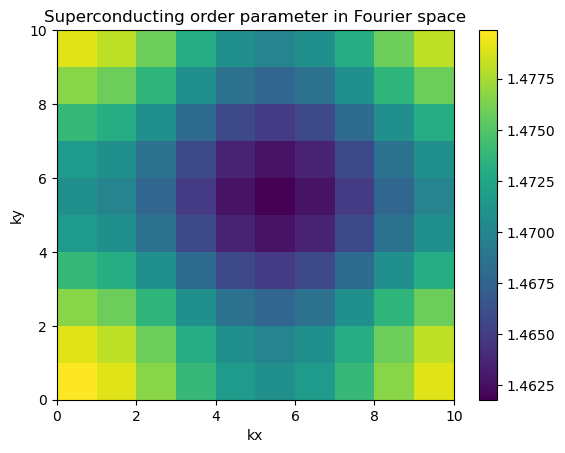

The mean value of the superconducting order parameter is  1.4707975410711456


In [125]:
N_f_spinless = int(N_f/2)

sc_order_parameter_real_space = hdm.Delta_for_h_m(delta_r = delta_r,Gamma_b=Gamma_b, Gamma_m=Gamma_m,input_variables = initial_input_variables,computed_variables= computed_variables_instance)

sc_order_parameter_fourier_space = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])

# plt.pcolormesh(np.real(np.reshape(sc_order_parameter_fourier_space, (10,10))) )
plt.pcolormesh(np.abs(np.reshape(sc_order_parameter_fourier_space, (10,10))))
# plt.pcolormesh(np.real(sc_order_parameter_real_space)) 
plt.colorbar()
plt.xlabel("kx")
plt.ylabel("ky")
plt.title("Superconducting order parameter in Fourier space")
plt.show()

sc_mean_value = np.sum(np.abs(sc_order_parameter_fourier_space))/len(sc_order_parameter_fourier_space)
print("The mean value of the superconducting order parameter is ", sc_mean_value)


Density of electrons
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.8002914705008425
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.8002914705008426


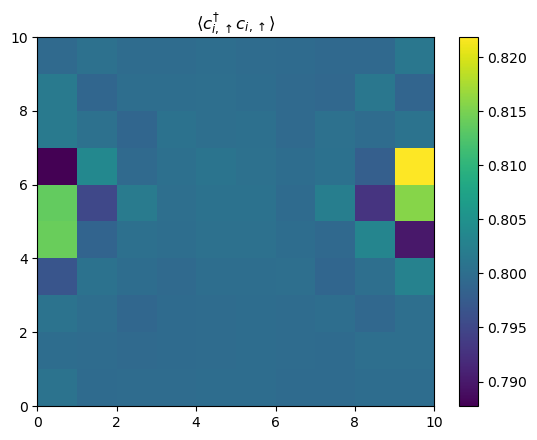

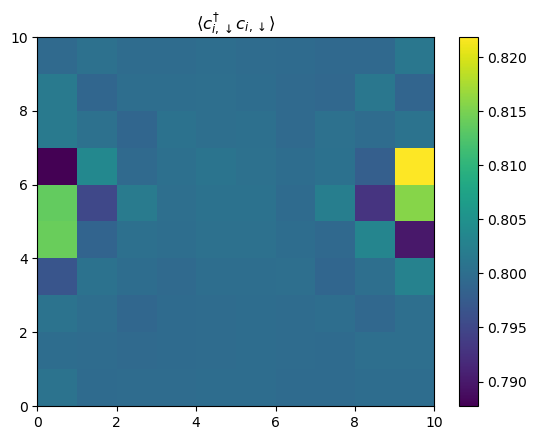

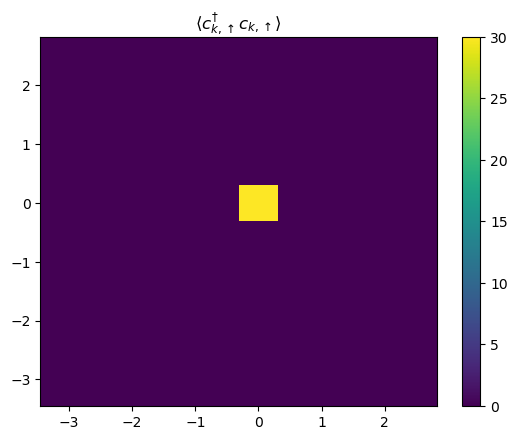

The CDW order paramter is  0.017089328694943118


In [126]:
c_dagger_c_data = cff.c_dagger_c_expectation_value_matrix_creation(Gamma_m,200)
c_c_dagger_data = cff.c_c_dagger_expectation_value_matrix_creation(Gamma_m,200)
c_c_data = cff.c_c_expectation_value_matrix_creation(Gamma_m,200)
c_dagger_c_dagger_data = cff.c_dagger_c_dagger_expectation_value_matrix_creation(Gamma_m,200)

print("Density of electrons")
average_density = np.real( np.sum(np.diag(c_dagger_c_data)[0:int(N_f/2)])/( N_f/2 ) )
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", average_density)
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", np.real( np.sum(np.diag(c_dagger_c_data)[int(N_f/2):])/(  N_f/2 ) ) )

# plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c_{i,\uparrow} c_{i,\downarrow} \rangle$")
# # save_file_name = "c_up_c_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c_{i,\downarrow} c_{i,\uparrow} \rangle$")
# # save_file_name = "c_down_c_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c^{\dagger}_{i,uparrow} c^{\dagger}_{i,\downarrow} \rangle$")
# # save_file_name = "c_dagger_up_c_dagger_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c^{\dagger}_{i,\uparrow} \rangle$")
# # save_file_name = "c_dagger_down_c_dagger_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# Plotting the c^{dagger} c expectation values
plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\uparrow} c_{i,\uparrow} \rangle$")
# save_file_name = "c_dagger_up_c_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# plt.savefig(save_file_name)
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c_{i,\downarrow} \rangle$")
# save_file_name = "c_dagger_down_c_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# plt.savefig(save_file_name)
plt.show()


fft_freq = np.fft.fftfreq(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ).shape[0])*2*np.pi
new_fft_freq = np.fft.fftshift(fft_freq)

fourier_transform = np.fft.fft2(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ) -0.5  )
shifted_fourier_transform = np.fft.fftshift(fourier_transform)
X,Y = np.meshgrid(new_fft_freq,new_fft_freq)

plt.pcolormesh(X,Y,np.real(shifted_fourier_transform))
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{k,\uparrow} c_{k,\uparrow} \rangle$")
plt.show()

# average_density = torch.sum(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])/len(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])
cdw_order_parameter = (np.max(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) ) -
                       np.min(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) ))/2
# c_dagger_c_data_up_up_fourier_space = 1/N_b*np.einsum('kn,lm,nm -> kl',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])
# plt.pcolormesh(np.real(c_dagger_c_data_up_up_fourier_space))
# plt.xlabel("k")
# plt.ylabel("k")
# plt.title(r"$\langle c^{\dagger}_{k,\uparrow} c_{k,\uparrow} \rangle$ in Fourier space")
# plt.colorbar()
# plt.show()
print("The CDW order paramter is ",cdw_order_parameter)

In [127]:
np.save("order_parameter_mu_"+str(chemical_potential_val)+".npy",np.array([average_density,sc_mean_value,cdw_order_parameter]))